In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def separe_en_lignes(image_binary : np, taux=0.999) -> list :
 
    """ 
    Description : Calcule le taux de pixels blancs présents sur chaque ligne de pixels. 
                  Sépare ensuite  les lignes de pixels en fonction de leur taux. 
                  On regarde dans la liste des indices des pixels blancs et si on observe un 'saut', c'est que des lignes de pixels de texte sont là
                  On stocke donc ces indices, qui correspondent aux indices des lignes de pixel contenant du texte
                  
                  Il peut arriver que certaines lignes soit considérées comme tel mais ne sont que des bas de "p" ou des choses du genre,
                  on va donc fusionner ces minis lignes avec celle de dessus

    Exemple : >>> exemple = separe_en_lignes(image)
                  exemple = [ (0, 21), (25, 65), ...]

    Input : (image) : une image binarisée en numpy
            (taux) : un float entre 0 et 1 représentant le nombre de pixels blancs / le nombre de pixels total de la ligne. De base sur 0.98

    Output : (indices_lignes) : une liste de tuples, chaque tuple les coordonées y de début et de fin de chaque ligne

    """
    # Listes contenant les indices y des lignes de pixels noirs et blanches (en fonction de leurs taux)
    liste_indices_pixels_blancs = []
    liste_indices_pixels_noirs = []

    for i in range(len(image_binary)) :
        ligne_pixel = image_binary[i]
        # Calcul du nombre de pixels blancs dans une ligne
        somme = 0
        for j in image_binary[i] :
            if j == 255 : 
                somme += 1
            else : 
                somme += 0
        # Calcul du taux de pixels blancs dans la ligne
        taux_de_blancs = somme/len(ligne_pixel)
        # Si le taux est > a un certain nombre (0.985 de base) on considère que cette ligne ne contient pas de texte
        if taux_de_blancs >= taux : #Quasi que des blancs
            liste_indices_pixels_blancs.append(i)
        else : 
            liste_indices_pixels_noirs.append(i)

    # On regarde dans la liste des indices des pixels blancs et si on observe un 'saut', c'est que des lignes de pixels de texte sont là
    # On stocke donc ces indices, qui correspondent aux indices des lignes de pixel contenant du texte
    indices_lignes = []
    for i in range(1, len(liste_indices_pixels_blancs)) :
        if liste_indices_pixels_blancs[i] != liste_indices_pixels_blancs[i-1]+1 :
            indices_lignes.append((liste_indices_pixels_blancs[i-1], liste_indices_pixels_blancs[i])) #Améliorer le +-10

    distances_suivant = [int((indices_lignes[i][0]-indices_lignes[i-1][1])/2) for i in range(1, len(indices_lignes))]
    distances_suivant.append(distances_suivant[-1])
    moyenne = int(sum(distances_suivant)/len(distances_suivant))
    for i in range(len(distances_suivant)) :
        if distances_suivant[i] > moyenne :
            distances_suivant[i] = moyenne


    for i in range(len(indices_lignes)) :
        if i == 0 :
            indices_lignes[i] = (indices_lignes[i][0] - distances_suivant[i], indices_lignes[i][1] + distances_suivant[i])
        elif i == len(indices_lignes) :
            indices_lignes[i] = (indices_lignes[i][0] - distances_suivant[i-1], indices_lignes[i][1] + distances_suivant[i-1])
        else :
            indices_lignes[i] = (indices_lignes[i][0] - distances_suivant[i-1], indices_lignes[i][1] + distances_suivant[i])

    
    return indices_lignes

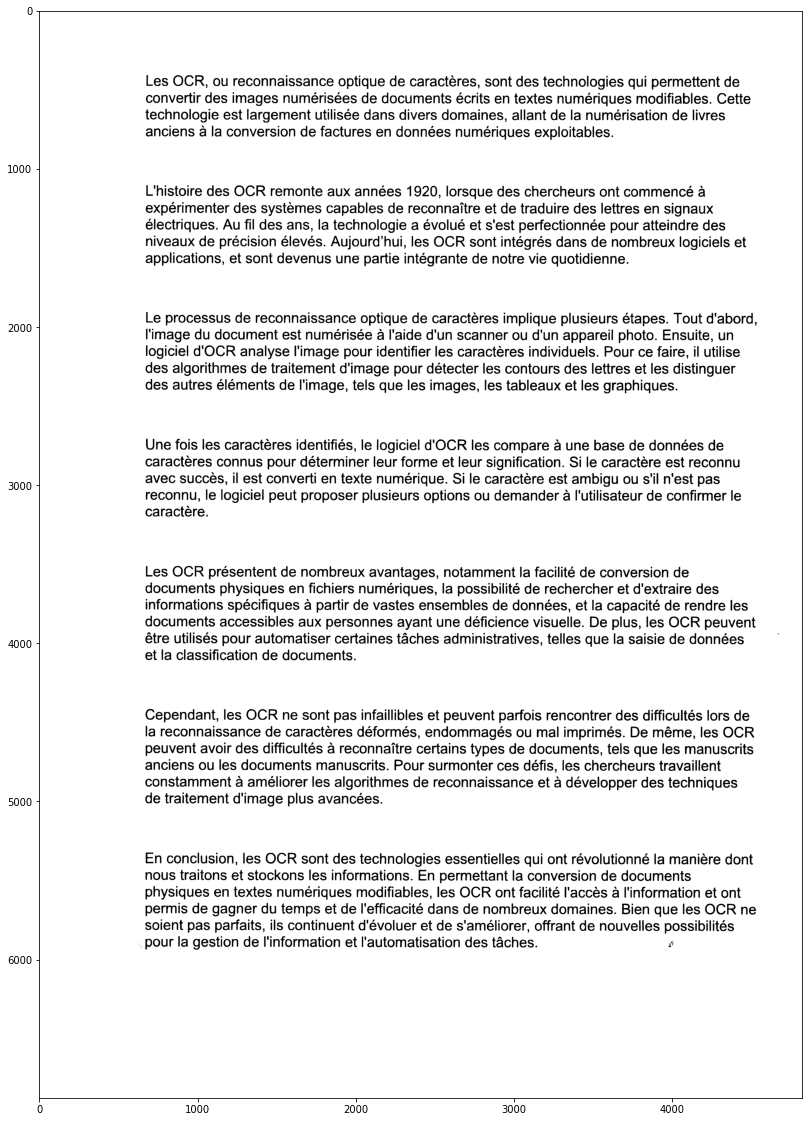

Indices y de début de fin pour chaque ligne : [(403, 510), (511, 616), (616, 720), (720, 849), (1077, 1203), (1204, 1311), (1312, 1416), (1417, 1523), (1523, 1650), (1878, 2005), (2006, 2110), (2111, 2215), (2216, 2323), (2324, 2451), (2679, 2806), (2807, 2913), (2914, 3019), (3020, 3123), (3123, 3230), (3482, 3608), (3609, 3712), (3712, 3818), (3818, 3924), (3925, 4030), (4031, 4138), (4386, 4513), (4513, 4619), (4620, 4725), (4726, 4827), (4828, 4937), (4937, 5061), (5293, 5421), (5421, 5525), (5526, 5630), (5630, 5737), (5738, 5842), (5843, 5944)]


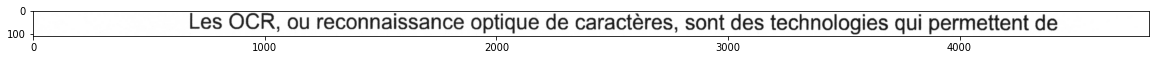

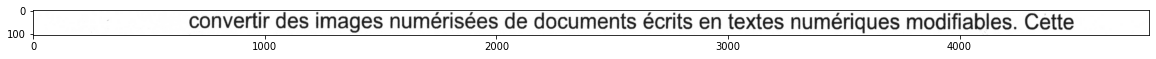

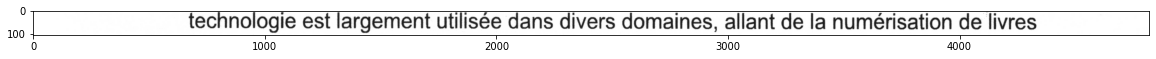

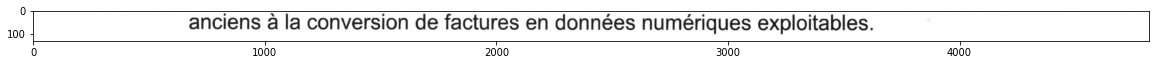

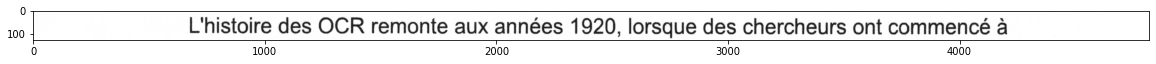

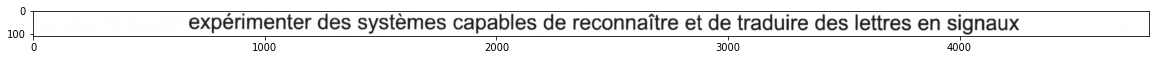

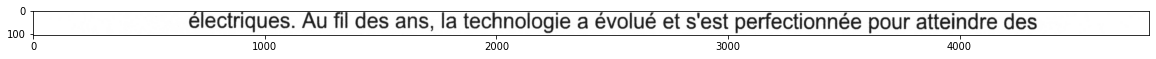

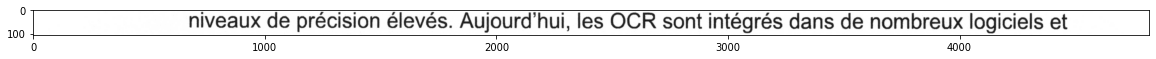

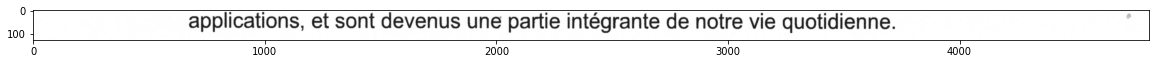

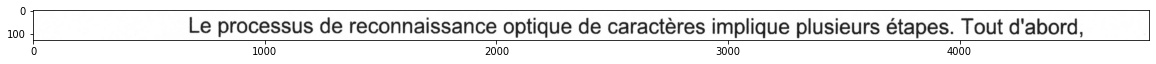

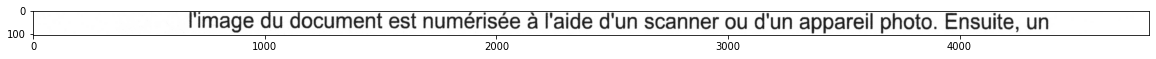

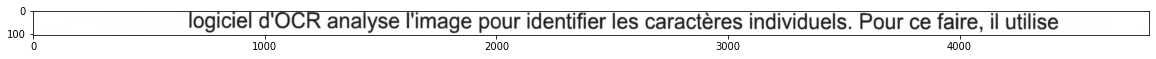

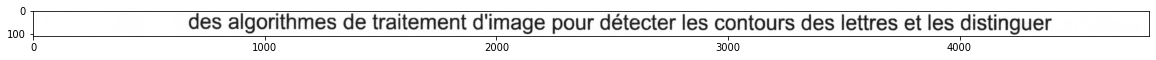

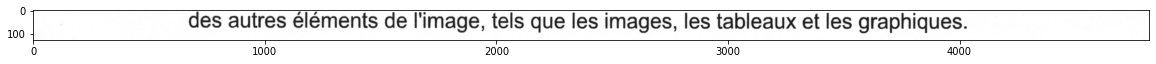

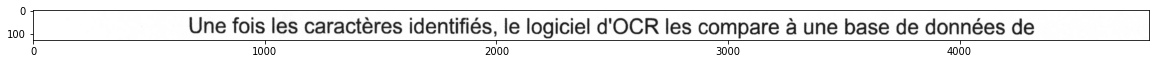

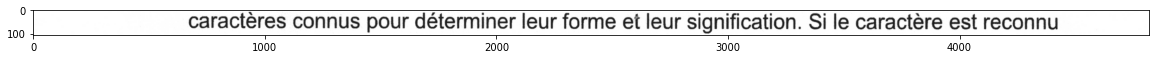

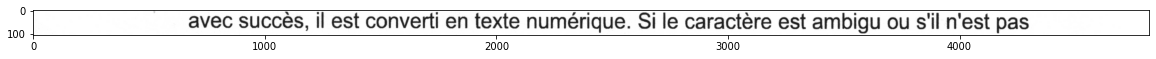

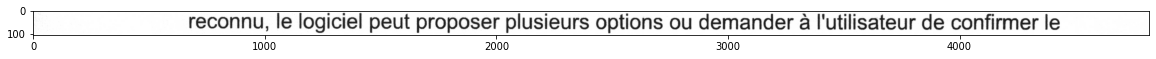

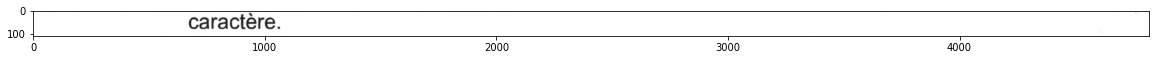

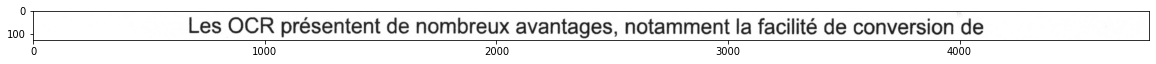

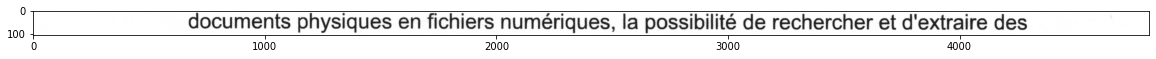

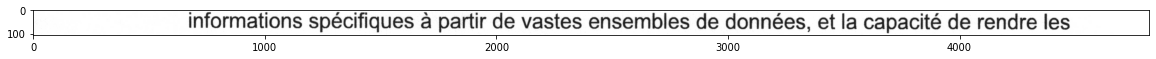

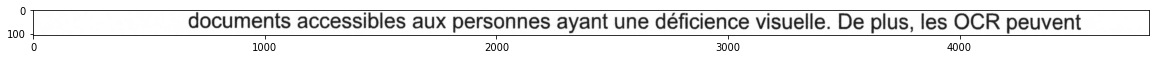

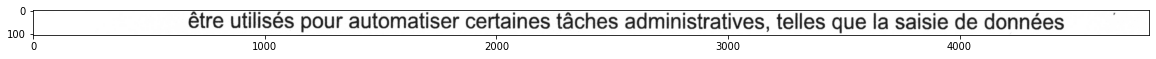

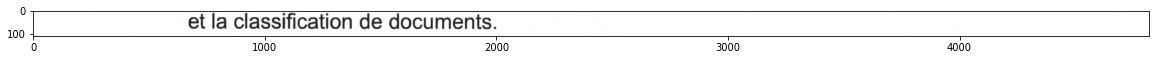

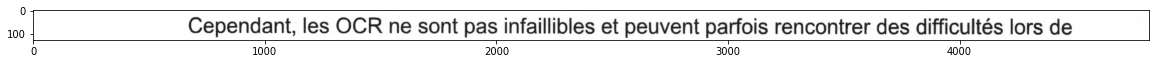

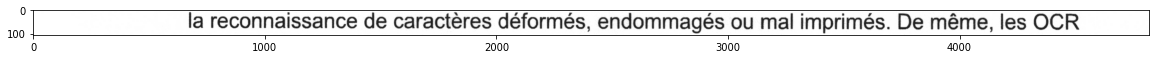

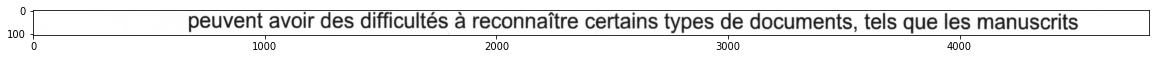

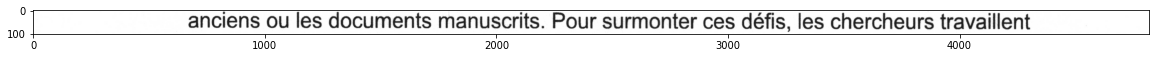

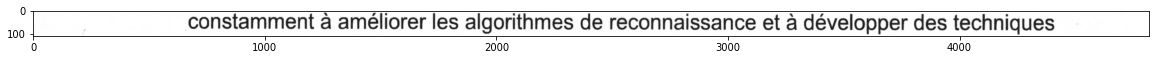

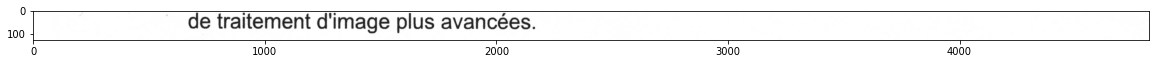

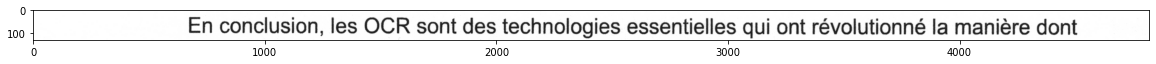

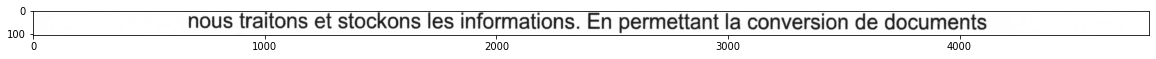

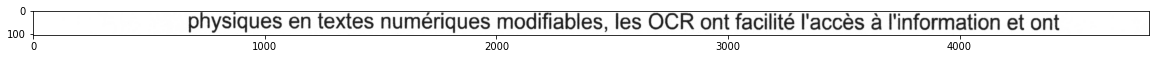

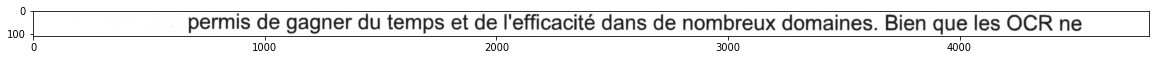

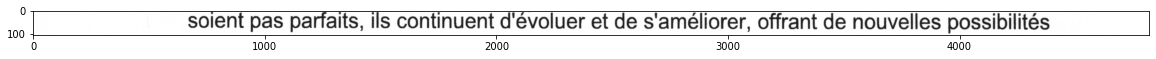

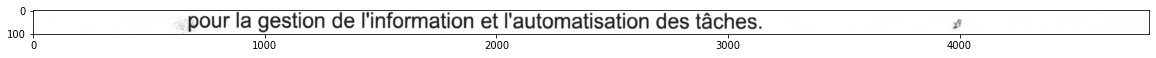

In [3]:
image = cv2.imread('scan.bmp')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.figure(figsize=(40,20))
plt.imshow(image_binary, cmap=plt.cm.gray)
plt.show()

indices_lignes = separe_en_lignes(image_binary)
print("Indices y de début de fin pour chaque ligne :", indices_lignes)

for t in indices_lignes :   
    plt.figure(figsize=(20,10))
    plt.imshow(image[t[0]:t[1]])
    plt.show()

In [4]:
print(len(indices_lignes))

37


In [14]:
print(indices_lignes)

[(410, 503), (518, 609), (623, 711), (729, 820), (1106, 1195), (1212, 1305), (1318, 1409), (1424, 1516), (1530, 1621), (1907, 1998), (2013, 2104), (2117, 2207), (2224, 2317), (2330, 2422), (2708, 2799), (2814, 2907), (2920, 3012), (3027, 3115), (3131, 3201), (3511, 3601), (3616, 3704), (3720, 3810), (3826, 3918), (3931, 4023), (4038, 4109), (4415, 4505), (4521, 4612), (4627, 4719), (4732, 4817), (4838, 4931), (4943, 5032), (5322, 5414), (5428, 5517), (5534, 5621), (5639, 5731), (5744, 5835), (5850, 5937)]


In [6]:
distances_suivant = [int((indices_lignes[i][0]-indices_lignes[i-1][1])/2) for i in range(1, len(indices_lignes))]
print(distances_suivant)
print(len(distances_suivant))


[7, 7, 9, 143, 8, 6, 7, 7, 143, 7, 6, 8, 6, 143, 7, 6, 7, 8, 155, 7, 8, 8, 6, 7, 153, 8, 7, 6, 10, 6, 145, 7, 8, 9, 6, 7]
36


In [15]:
distances_suivant = [int((indices_lignes[i][0]-indices_lignes[i-1][1])/2) for i in range(1, len(indices_lignes))]
distances_suivant.append(distances_suivant[-1])

for i in range(len(indices_lignes)) :
    if i == 0 :
        indices_lignes[i] = (indices_lignes[i][0] - distances_suivant[i], indices_lignes[i][1] + distances_suivant[i])
    elif i == len(indices_lignes) :
        indices_lignes[i] = (indices_lignes[i][0] - distances_suivant[i-1], indices_lignes[i][1] + distances_suivant[i-1])
    else :
        indices_lignes[i] = (indices_lignes[i][0] - distances_suivant[i-1], indices_lignes[i][1] + distances_suivant[i])

In [16]:
print(indices_lignes)

[(403, 510), (511, 616), (616, 720), (720, 963), (963, 1203), (1204, 1311), (1312, 1416), (1417, 1523), (1523, 1764), (1764, 2005), (2006, 2110), (2111, 2215), (2216, 2323), (2324, 2565), (2565, 2806), (2807, 2913), (2914, 3019), (3020, 3123), (3123, 3356), (3356, 3608), (3609, 3712), (3712, 3818), (3818, 3924), (3925, 4030), (4031, 4262), (4262, 4513), (4513, 4619), (4620, 4725), (4726, 4827), (4828, 4937), (4937, 5177), (5177, 5421), (5421, 5525), (5526, 5630), (5630, 5737), (5738, 5842), (5843, 5944)]


In [9]:
print(i)
print(distances_suivant[35])

36
7
